# Make Classifiers  

This script runs a nested cross-validation within the training data and saves the classifiers

### import modules

In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn import preprocessing, model_selection, metrics

import pickle

### get data

as an example, here we load a dataset for one type of roi size:

In [3]:
df = pd.read_csv('../data/interim/csv/roiLaterality_pat0001_a.csv',index_col=[0],header=[0,1])

In [ ]:
df.tail()

when we load from csv, the index and columns are strings by default, but to be able to sort and plot with the thresholds as numbers, we convert the column names to floats

In [5]:
def changeDf(df):
    
    idx1 = df.columns.get_level_values(0).astype(float)
    idx2 = df.columns.get_level_values(1)

    mIdx = pd.MultiIndex.from_arrays([idx1,idx2])

    df.columns = mIdx
    df.sort_index(axis=1)

    return df

In [6]:
df = changeDf(df)

In [7]:
df.columns[:5]

MultiIndex(levels=[[-10.0, -9.9, -9.8, -9.7, -9.6, -9.5, -9.4, -9.3, -9.2, -9.1, -9.0, -8.9, -8.8, -8.7, -8.6, -8.5, -8.4, -8.3, -8.2, -8.1, -8.0, -7.9, -7.8, -7.7, -7.6, -7.5, -7.4, -7.3, -7.2, -7.1, -7.0, -6.9, -6.8, -6.7, -6.6, -6.5, -6.4, -6.3, -6.2, -6.1, -6.0, -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5

In [8]:
df.tail()

-10.0           -9.9            -9.8            -9.7  ...  19.6  19.7       \
     L+R  L-R   LI   L+R  L-R   LI   L+R  L-R   LI   L+R ...    LI   L+R  L-R   
75   2.0  0.0  0.0   2.0  0.0  0.0   2.0  0.0  0.0   2.0 ...   NaN   0.0  0.0   
80   2.0  0.0  0.0   2.0  0.0  0.0   2.0  0.0  0.0   2.0 ...   NaN   0.0  0.0   
85   2.0  0.0  0.0   2.0  0.0  0.0   2.0  0.0  0.0   2.0 ...   NaN   0.0  0.0   
90   2.0  0.0  0.0   2.0  0.0  0.0   2.0  0.0  0.0   2.0 ...   NaN   0.0  0.0   
95   2.0  0.0  0.0   2.0  0.0  0.0   2.0  0.0  0.0   2.0 ...   NaN   0.0  0.0   

        19.8           19.9           
    LI   L+R  L-R  LI   L+R  L-R  LI  
75 NaN   0.0  0.0 NaN   0.0  0.0 NaN  
80 NaN   0.0  0.0 NaN   0.0  0.0 NaN  
85 NaN   0.0  0.0 NaN   0.0  0.0 NaN  
90 NaN   0.0  0.0 NaN   0.0  0.0 NaN  
95 NaN   0.0  0.0 NaN   0.0  0.0 NaN  

[5 rows x 900 columns]

In [9]:
df.loc[:,-3.0]

,L+R,L-R,LI
0,1.495994,0.078759,0.052647
5,1.503161,0.082841,0.055111
10,1.509814,0.087470,0.057934
15,1.515057,0.091834,0.060614
20,1.521087,0.096090,0.063172
25,1.527040,0.101620,0.066547
30,1.534045,0.105844,0.068997
35,1.541419,0.111256,0.072178
40,1.551400,0.115466,0.074427
45,1.559497,0.120977,0.077574


### get labels into integer form

Initialize a Labeler, which allows to switch from string labels (e.g. "left" to integer labels e.g. 0 and back).

In [10]:
myLabeler = pickle.load( open('../models/myLabeler.p','rb') )

## divide into training and test data

In [11]:
my_train = pickle.load( open('../models/my_nest.p','rb'))

### get all data

In [12]:
csvList = ['../data/interim/csv/%s'%x for x in os.listdir('../data/interim/csv/') if x.startswith('roiLaterality_pat')]
csvList.sort()

In [ ]:
csvList[-5:]

In [14]:
def makeDf(csvList,trainOrTest):
    df = pd.DataFrame()
    for pat in csvList:
        for lab in trainOrTest:
            if lab[-1] in pat:
                thisDf = pd.DataFrame([pat],index=[[lab[0]],[lab[1]]])
                df = pd.concat([df,thisDf])
    df.columns = ['csv']
    return df

In [15]:
dfTrain = makeDf(csvList,my_train)

In [ ]:
dfTrain.tail()

In [17]:
dfTrain.shape

(521, 1)

In [18]:
def getAll(dfTrain):
    
    bigDf = pd.DataFrame()
    
    for i in dfTrain.index:
        
        csv = dfTrain.loc[i]['csv']
        df = changeDf( pd.read_csv(csv,index_col=[0],header=[0,1]) )
        thisDf = pd.DataFrame( df.unstack() ).T
        thisDf.index = [[i[0]],[i[1]]]
        bigDf = pd.concat([bigDf,thisDf])
        
    bigDf = bigDf.reorder_levels([1,2,0],axis=1)
    bigDf.sort_index(inplace=True)

    return bigDf

In [19]:
df = getAll(dfTrain)

In [ ]:
df.tail()

In [64]:
df.shape

(521, 18000)

### get features and labels into arrays

In [22]:
def makeXy(roiSize,thresh,dims,df=df,myLabeler=myLabeler):
    
    if dims==1:
        # select the data
        thisDf = pd.DataFrame( df['LI'][roiSize][thresh] )
    elif dims==2:
        diffDf = pd.DataFrame( df['L-R'][roiSize][thresh] )
        addDf = pd.DataFrame( df['L+R'][roiSize][thresh] )
        thisDf = pd.concat([diffDf,addDf],axis=1 )
    # make int labels
    labels = thisDf.index.get_level_values(0)#[ thisDf.index.levels[0][x] for x in thisDf.index.labels[0] ]
    y = myLabeler.fit_transform(labels)

    # put features into matrix
    X = np.array( thisDf ).reshape(-1,thisDf.shape[-1])
    
    return X,y

In [23]:
X,y = makeXy(50,3.0,dims=2)

In [24]:
X

array([[ 0.04018303,  0.27935426],
       [ 0.11071595,  0.28089717],
       [ 0.0669625 ,  0.32709931],
       ..., 
       [-0.05545634,  0.16030088],
       [-0.00308276,  0.05656758],
       [-0.10056876,  0.18701565]])

In [25]:
X,y =  makeXy(50,3.0,dims=1)

In [72]:
zip(X[::20],y[::20])

[(array([ 0.14384255]), 0),
 (array([ 0.16110498]), 0),
 (array([ 0.21707046]), 0),
 (array([ 0.00624919]), 1),
 (array([ 0.70587051]), 1),
 (array([ 0.13339308]), 1),
 (array([-0.02731937]), 1),
 (array([ 0.31087715]), 2),
 (array([ 0.76318893]), 2),
 (array([ 0.25510519]), 2),
 (array([ 0.58986949]), 2),
 (array([ 0.34182313]), 2),
 (array([ 0.54352429]), 2),
 (array([ 0.35409723]), 2),
 (array([ 0.26630242]), 2),
 (array([ 0.93941679]), 2),
 (array([ 0.85517831]), 2),
 (array([ 0.87120038]), 2),
 (array([ 0.458595]), 2),
 (array([ 0.28711972]), 2),
 (array([ 0.80873953]), 2),
 (array([ 0.53069617]), 2),
 (array([ 0.52682235]), 2),
 (array([ 0.6676319]), 2),
 (array([ 0.5446064]), 2),
 (array([-0.06302284]), 3),
 (array([-0.53775586]), 3)]

### split the nest set into training and validation set

In [28]:
def dropNans(X,y):
    # get rid of nans for (because they throw an error when we try to fit the classifier)
    
    # this works also for multi-feature X (each observation row has multiple columns/features)
    noNanTrain = np.where(np.isnan(X).sum(axis=1)==False)
    
    # X and y need to be changed, otherwise the order of real and predicted labels
    # will not match
    X = X[noNanTrain[0]]
    y = y[noNanTrain[0]]
    return X,y

In [29]:
def dropInc(X,y,myLabeler=myLabeler):

    # here, we use the labels (y) to find and exclude inconclusive cases
    noInc = np.where(y!=myLabeler.transform(['inconclusive'])[-1])
    
    # both X and y need to be changed
    X = X[noInc[0]]
    y = y[noInc[0]]
    
    return X,y

In [30]:
def makeSplit(X,y,rdState=1,drop=True):
    
    thisSplit = model_selection.StratifiedShuffleSplit(n_splits=1,test_size=0.5,random_state=rdState)
    
    for train_index,validate_index in thisSplit.split(X,y):
        X_train,X_validate = X[train_index],X[validate_index]
        y_train,y_validate = y[train_index],y[validate_index]

    # for training, we cannot use nans, but for testing, we can later hard-code that
    # any nan should be classified as inconclusive
    X_train,y_train = dropNans(X_train,y_train)
    
    if drop:
        X_train,y_train = dropInc(X_train,y_train)
        X_validate,y_validate = dropInc(X_validate,y_validate)

    return X_train,X_validate,y_train,y_validate

In [31]:
X_train,X_validate,y_train,y_validate = makeSplit(X,y,rdState=1,drop=False)

In [32]:
print X_train.shape

(257, 1)


now both x and y are divided into two halves

In [33]:
print X_train.shape,X_validate.shape,y_train.shape,y_validate.shape

(257, 1) (261, 1) (257,) (261,)


In [34]:
X_train[-5:]

array([[ 0.52336761],
       [ 0.53256946],
       [ 0.3627661 ],
       [ 0.84919677],
       [ 1.        ]])

### fit the classifier to the training data

In [35]:
def makeFit(X_train,y_train):
    
    scaler = preprocessing.StandardScaler()
    X_train_std = scaler.fit_transform(X_train)

    clf = SVC(kernel='linear', C=1.0, probability=True,random_state=0)
    clf.fit(X_train_std,y_train)
    
    return clf,scaler

In [36]:
clf,scaler = makeFit(X_train,y_train)

### use the classifier to predict the left-out validation data

In [37]:
def makeYPreds(X_validate,clf,scaler,myLabeler=myLabeler):
    
    y_pred = []

    for x in X_validate:
        
        # when there is no LI, we consider the case to be inconclusive
        if np.isnan(x).any():
            pred = myLabeler.transform(['inconclusive'])[-1]
            
        # otherwise we apply the acutal classifier
        else:
            scaledX = scaler.transform( x.reshape(1,-1) )
            pred = clf.predict(scaledX)[-1]
            
        y_pred.append(pred)
    
    return np.array(y_pred)

In [38]:
y_pred = makeYPreds(X_validate,clf,scaler)

In [39]:
print y_pred

[2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 0 2 2 0 2 2 2 2 2 3
 2 2 2 2 0 2 2 0 2 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 3 2 2 2 0 2
 2 2 2 2 0 2 1 0 2 2 2 3 2 0 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3
 2 2 2 2 2 0 0 2 2 2 2 0 0 3 2 2 2 3 2 2 2 2 2 0 2 2 0 3 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 0 2 2 0 2 0 2 0 0 3 2 2 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 3 2 2 2 2 0 2 2 3 0 2 3 1 2 0 2 3 2 2 3 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2
 2 2]


### get confusion matrix from prediction of testing data

In [40]:
def makeCm(X_validate,y_validate,y_pred,clf,scaler,myLabeler=myLabeler):

    # predictions of left-out data
    y_pred = makeYPreds(X_validate,clf,scaler)
    # confusion matrix -- input y and y_pred -- result: true in rows, pred in columns
    cm = metrics.confusion_matrix(y_validate,y_pred)

    # put into df
    cmDf = pd.DataFrame(cm)

    # get the naming right
    try:
        theseLabels = myLabeler.inverse_transform( np.unique(y_validate) )
        cmDf.index = theseLabels
        cmDf.columns = theseLabels
    except:
        theseLabels = myLabeler.classes_
        cmDf.index = theseLabels
        cmDf.columns = theseLabels       

    # make better order
    theseLabels = ['left','bilateral','right','inconclusive']
    cmDf = cmDf.reindex(index=theseLabels)
    cmDf = cmDf.reindex(columns=theseLabels)
    
    cmDf.index = [['True label']*cmDf.shape[0],theseLabels]
    cmDf.columns = [['Predicted label']*cmDf.shape[1],theseLabels]

    return cmDf

In [41]:
cmDf = makeCm(X_validate,y_validate,y_pred,clf,scaler)

In [42]:
cmDf

Predicted label                             
                                   left bilateral right inconclusive
True label left                     174         2     0            0
           bilateral                 11        14     0            0
           right                      0         3    10            2
           inconclusive              20        15     7            3

### scale confusion matrix by total number of cases

In [43]:
def makeScaleCm(cmDf):
    return ( cmDf.astype(float).T/cmDf.sum(axis=1) ).T

In [44]:
cmScaleDf = makeScaleCm(cmDf)

In [45]:
cmScaleDf

Predicted label                                 
                                   left bilateral     right inconclusive
True label left                0.988636  0.011364  0.000000     0.000000
           bilateral           0.440000  0.560000  0.000000     0.000000
           right               0.000000  0.200000  0.666667     0.133333
           inconclusive        0.444444  0.333333  0.155556     0.066667

sanity check: true labels for each class should add up to one

In [46]:
cmScaleDf.T.sum()

True label  left            1.0
            bilateral       1.0
            right           1.0
            inconclusive    1.0
dtype: float64

### get diagonal (correct answers only)

In [47]:
def makeDiagCm(cmDf,idx):
    
    # get diagonal
    diagDf = pd.DataFrame(np.diagonal(cmDf)).T
    diagDf.index=idx
    diagDf.columns=cmDf.columns
    
    return diagDf

In [48]:
diagDf = makeDiagCm(cmDf,[['diag'],[0]])

In [49]:
diagDf

Predicted label                             
                  left bilateral right inconclusive
diag 0             174        14    10            3

### get accuracy from diagonal

In [50]:
def getAcc(cmDf,drop=True):
    
    # get absolute count of hits (diagonal)
    n_diag = makeDiagCm(cmDf,[['total'],['total']]).sum(axis=1).values[-1]

    # get absolute count of all test data
    n_total = cmDf.sum().sum()

    # get proportion
    prop = n_diag/float(n_total)

    
    return pd.DataFrame([prop],index=['acc']).T

In [51]:
getAcc(cmDf,drop=True)

,acc
0,0.770115


### Train in  nested way

In [52]:
def getClfs(roiSize,dims,n_iter=100,drop=True):

    clfDict = {}
    accDict = {}

    #for threshold in df.columns:
    for threshold in np.arange(-5,15,0.2):
        # get the LIs for a threshold
        X,y = makeXy(roiSize,round(threshold,2),dims)
        # split into train and test
        
        thisAcc = []
        
        for r in range(n_iter):
            
            X_train,X_validate,y_train,y_validate = makeSplit(X,y,rdState=r,drop=drop)

            # train the classifer
            clf,scaler = makeFit(X_train,y_train)
            # make the predictions
            y_pred = makeYPreds(X_validate,clf,scaler)
            # get the confusion matrix
            cmDf = makeCm(X_validate,y_validate,y_pred,clf,scaler)
            # get the diagonal (correct responses)
            diagDf = makeDiagCm(cmDf,[['diag'],[0]])    
        
            thisAcc.append( getAcc(cmDf).iloc[0].acc )
        
        # store the classifier and the scaler, but trained on the whole data,
        # because we will later apply it to the left-out dataset
        X,y = dropNans(X,y)
        
        if drop:
            X,y = dropInc(X,y)
            
        clf,scaler = makeFit(X,y)
        clfDict[round(threshold,1)] = {'clf':clf,'scaler':scaler}
        
        # store the average performance for the left-out data using the nested-cv results above
        accDict[round(threshold,1)] = np.mean(thisAcc)

    return clfDict,accDict

Example for one ROI size (df)

In [53]:
clfDict,accDict = getClfs(50,1,n_iter=1,drop=True)

Example of a stored classifer-scaler pair

In [54]:
print clfDict[clfDict.keys()[-1]]

{'clf': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False), 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


Example of the accuracies for all thresholds of one ROI size:

In [55]:
print accDict

{0.0: 0.87037037037037035, 1.0: 0.89351851851851849, 2.0: 0.89814814814814814, 3.0: 0.91203703703703709, 4.0: 0.90277777777777779, 5.0: 0.89814814814814814, 6.0: 0.875, 7.0: 0.87037037037037035, 8.0: 0.84259259259259256, 9.0: 0.82407407407407407, 10.0: 0.79629629629629628, 11.0: 0.7407407407407407, 12.0: 0.6157407407407407, 13.0: 0.52314814814814814, 14.0: 0.44444444444444442, 12.8: 0.55555555555555558, -2.2: 0.82870370370370372, 8.2: 0.83333333333333337, 0.2: 0.87962962962962965, 4.8: 0.90277777777777779, -4.4: 0.82407407407407407, 3.8: 0.90740740740740744, 7.4: 0.85648148148148151, -4.8: 0.81944444444444442, 12.6: 0.56944444444444442, 13.4: 0.47222222222222221, 0.4: 0.87962962962962965, 8.8: 0.82407407407407407, 0.6: 0.875, 9.4: 0.81481481481481477, 3.2: 0.91203703703703709, 1.6: 0.89814814814814814, -1.4: 0.82407407407407407, 0.8: 0.8842592592592593, 6.2: 0.86111111111111116, -4.6: 0.81944444444444442, 3.6: 0.91666666666666663, 1.2: 0.89814814814814814, -1.2: 0.83796296296296291, 13

### Do this for all ROI sizes

In [56]:
def getAllClfs(dims,drop,n_iter=100):
    
    clfDict = {}
    accDict = {}
    
    for pc in range(0,96,5):
        #print pc
        # this does everything to get and evaluate the classifiers
        thisClfDict,thisAccDict = getClfs(pc,dims,n_iter=n_iter,drop=drop)
        clfDict[pc] = thisClfDict
        accDict[pc] = thisAccDict
        
    return clfDict,accDict

Example:

In [57]:
clfDict,accDict = getAllClfs(dims=1,drop=True,n_iter=2)

In [58]:
print clfDict.keys()

[0, 65, 35, 5, 70, 40, 10, 75, 45, 15, 80, 50, 20, 85, 55, 25, 90, 60, 30, 95]


In [59]:
print clfDict[0].keys()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 12.8, -2.2, 8.2, 0.2, 4.8, -4.4, 3.8, 7.4, -4.8, 12.6, 13.4, 0.4, 8.8, 0.6, 9.4, 3.2, 1.6, -1.4, 0.8, 6.2, -4.6, 3.6, 1.2, -1.2, 13.8, 12.4, 3.4, 13.2, 2.2, 10.4, 13.6, 5.8, 8.6, 6.4, 7.8, 2.4, 5.4, -4.2, 10.6, 4.6, 5.6, 9.8, 11.6, 11.8, -3.8, 12.2, -1.8, 4.4, 1.4, 2.6, 14.2, 5.2, -2.4, -2.6, -3.4, -0.2, 9.6, 14.8, 1.8, -2.8, 11.2, 2.8, 6.6, 6.8, 7.6, 10.2, -3.2, -1.6, 7.2, -3.6, -0.4, 9.2, 8.4, 10.8, 11.4, 4.2, 14.6, -0.8, -0.6, 14.4, -1.0, -5.0, -4.0, -3.0, -2.0]


### show all accuracies

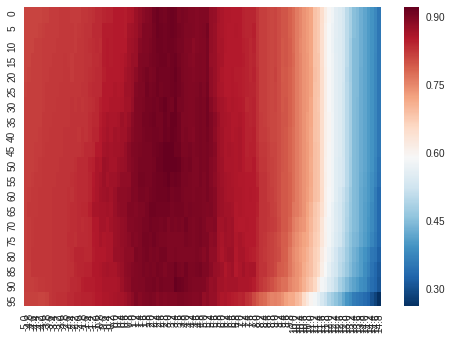

In [60]:
accDf = pd.DataFrame(accDict).T
sns.heatmap( accDf, cmap='RdBu_r')

## Run everything for each of the 4 versions & save

In [61]:
from datetime import datetime

In [62]:
for thisDim in [1,2]:
    for thisDrop in [True,False]:
        print thisDim,thisDrop, datetime.now()
        # fit the classifier
        clfDict,accDict = getAllClfs(dims=thisDim,drop=thisDrop,n_iter=100)
        
        # save for later re-use
        dropStr = ['full','drop'][thisDrop]
        dimStr = ['1d','2d'][thisDim-1]
        
        pickle.dump(clfDict, open('../models/clf_%s_%s.p'%(dimStr,dropStr),'wb'))
        pickle.dump(accDict, open('../models/acc_%s_%s.p'%(dimStr,dropStr),'wb'))

1 True 2019-01-23 08:57:30.577788
1 False 2019-01-23 10:53:03.327269
2 True 2019-01-23 13:19:15.983233
2 False 2019-01-23 15:22:15.653904
